# Ambev data challenge
## Adriano Freitas

## Entendendo e limpando os dados
Este notebook tem o objetivo de fazer uma higienização da base de dados. Para tanto uma pequena análise exploratória será necessária, porém essa análise não será extensiva uma vez que não é o objetivo principal.
Uma análise exploratória mais detalhada pode ser encontrada no notebook [02-agf-exploratory-analysis.ipynb](02-agf-exploratory-analysis.ipynb).

In [1]:
%%capture

%run ./00-agf-utils.ipynb

%store -r default_color
%store -r default_light_color
%store -r default_dark_color
%store -r colormap
%store -r figsize

In [2]:
data_path = '../data/interim/'
file_name = 'ambev-final-dataset_AmBev_final_dataset.csv'

In [3]:
df = pd.read_csv(os.path.join(data_path, file_name))

/Users/adrianofreitas/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (5,12,13,14,15,20,23,24,25,26,27,32,33,37) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.shape
df.info()
df.describe()
df.head()
df.tail()

(270633, 38)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270633 entries, 0 to 270632
Data columns (total 38 columns):
Mês Referência           270633 non-null float64
País                     270633 non-null object
Mundo                    270501 non-null object
Regional/Área           270633 non-null float64
Unidade                  270633 non-null float64
Grupo Cargo              230099 non-null object
Cargo                    262118 non-null object
Grade                    262118 non-null float64
Banda                    262118 non-null object
Área                    262116 non-null object
Nome FuncionÁ¡rio        270633 non-null float64
Nome Gestor              270633 non-null float64
Código KPI               230229 non-null object
Diretoria                230229 non-null object
Áreas da Diretoria      230229 non-null object
Função                   230229 non-null object
Tipo da Meta             270633 non-null object
Categoria KPI            267176 non-null object
Nome KPI           

,Mês Referência,Regional/Área,Unidade,Grade,Nome FuncionÁ¡rio,Nome Gestor,Nome KPI,Peso KPI,% Acum Acumulado,% Ating Fim Exer,% Pontos Fim Exer,% Acum Fim Exer,Unnamed: 34,Unnamed: 35,Unnamed: 36
count,270633.00,270633.00,270633.00,262118.00,270633.00,270633.00,270633.00,270633.00,120624.00,106766.00,129371.00,131582.00,28.00,2.00,2.00
mean,80149.42,10.93,181.46,10.59,3935.70,1002.30,2761.77,20.09,13.94,92.25,87.81,17.94,37.50,100.00,20.00
std,28171.73,6.97,100.71,1.96,2273.32,579.57,1417.98,4.33,9.85,24.23,29.51,7.64,18.18,0.00,0.00
min,32017.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,30.00,100.00,20.00
25%,62017.00,4.00,94.00,9.00,1961.00,494.00,1589.00,20.00,0.00,100.00,100.00,16.00,30.00,100.00,20.00
50%,82017.00,11.00,221.00,10.00,3947.00,996.00,2945.00,20.00,20.00,100.00,100.00,20.00,30.00,100.00,20.00
75%,102017.00,19.00,264.00,12.00,5919.00,1521.00,3973.00,20.00,20.00,100.00,100.00,20.00,40.00,100.00,20.00
max,122017.00,22.00,331.00,17.00,7858.00,2004.00,4917.00,80.00,100.00,100.00,100.00,100.00,100.00,100.00,20.00


,Mês Referência,País,Mundo,Regional/Área,Unidade,Grupo Cargo,Cargo,Grade,Banda,Área,Nome FuncionÁ¡rio,Nome Gestor,Código KPI,Diretoria,Áreas da Diretoria,Função,Tipo da Meta,Categoria KPI,Nome KPI,Peso KPI,Prazo,Regra Alcance Parcial,Meta Projeto,% Ating Mês,% Pontos Mês,% Acum Mês,% Ating Acumulado,% Pontos Acumulado,% Acum Acumulado,% Ating Fim Exer,% Pontos Fim Exer,% Acum Fim Exer,Status Meta,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37
0,32017.00,Brasil,Sales,10.00,78.00,GER DE VENDAS REVENDA,GERENTE DE VENDAS REVENDA II,12.00,VI-B,GERÊNCIA CD,2774.00,237.00,001VA0561,Diretoria de Vendas e Distribuição,AC,GER DE VENDAS,Mandatório,Market Share/ Volume,4729.00,25.00,12/31/2017 12:00:00 AM,"PA1: 99,5% da meta PA2: 99,0% da meta",Não,0.0,0.0,0.0,0.0,0.0,0.00,100.00,100.00,25.00,Monitoramento Aprovado,NaN,nan,nan,nan,NaN
1,32017.00,Brasil,Sales,10.00,78.00,GER DE VENDAS REVENDA,GERENTE DE VENDAS REVENDA II,12.00,VI-B,GERÊNCIA CD,2774.00,237.00,001VA0609,Diretoria de Vendas e Distribuição,AC,GER DE VENDAS,Mandatório,Market Share/ Volume,3138.00,20.00,12/31/2017 12:00:00 AM,80% pontos: -10pp vs Bgt,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,nan,nan,NaN,NaN,nan,nan,nan,NaN
2,32017.00,Brasil,Sales,10.00,78.00,GER DE VENDAS REVENDA,GERENTE DE VENDAS REVENDA II,12.00,VI-B,GERÊNCIA CD,2774.00,237.00,001TM0051,Diretoria de Vendas e Distribuição,Trade Marketing,GER DE VENDAS,Mandatório,Market Share/ Volume,3103.00,20.00,12/31/2017 12:00:00 AM,PA1: 80% = 80% pts PA2: 60% = 60% pts,Não,80.0,60.0,12.0,80.0,60.0,12.00,100.00,100.00,20.00,Monitoramento Aprovado,NaN,nan,nan,nan,NaN
3,32017.00,Brasil,Sales,10.00,78.00,GER DE VENDAS REVENDA,GERENTE DE VENDAS REVENDA II,12.00,VI-B,GERÊNCIA CD,2774.00,237.00,001VC0272,Diretoria de Vendas e Distribuição,Campo,GER DE VENDAS,Mandatório,Market Share/ Volume,4757.00,15.00,12/31/2017 12:00:00 AM,PA1: 95%_x000D_ PA2: 90%,Não,100.0,100.0,15.0,90.0,80.0,12.00,100.00,100.00,15.00,Monitoramento Aprovado,NaN,nan,nan,nan,NaN
4,32017.00,Brasil,Sales,10.00,78.00,GER DE VENDAS REVENDA,GERENTE DE VENDAS REVENDA II,12.00,VI-B,GERÊNCIA CD,2774.00,237.00,001RF0335,Diretoria de Refrigenanc,AC,GER DE VENDAS,Mandatório,Market Share/ Volume,4762.00,20.00,12/31/2017 12:00:00 AM,"80% pontos: 97,5% da meta",NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,nan,nan,NaN,NaN,nan,nan,nan,NaN


,Mês Referência,País,Mundo,Regional/Área,Unidade,Grupo Cargo,Cargo,Grade,Banda,Área,Nome FuncionÁ¡rio,Nome Gestor,Código KPI,Diretoria,Áreas da Diretoria,Função,Tipo da Meta,Categoria KPI,Nome KPI,Peso KPI,Prazo,Regra Alcance Parcial,Meta Projeto,% Ating Mês,% Pontos Mês,% Acum Mês,% Ating Acumulado,% Pontos Acumulado,% Acum Acumulado,% Ating Fim Exer,% Pontos Fim Exer,% Acum Fim Exer,Status Meta,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37
270628,122017.00,Saint Vincent,Supply,4.00,327.00,NaN,GER QUALIDADE ASSEGURADA I,12.00,VI-b,PROCESSO CERVEJA,5597.00,115.00,NaN,NaN,NaN,NaN,Metas Individuales 5,Quality,3065.00,20.00,31.12.17,gap Rule: gap = (Real - Real AA) / (Target - R...,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,nan,nan,NaN,NaN,nan,nan,nan,NaN
270629,122017.00,Saint Vincent,Supply,4.00,327.00,NaN,GER ENGENHARIA I,12.00,VI-b,MANUTENÃ! ÃO,7325.00,115.00,NaN,NaN,NaN,NaN,Metas Individuales 1,"Profitability / Costs (Maco, VIC, VLC, Ebitda,...",1580.00,20.00,31.12.17,Project 4 KPIs: 4 KPIs = 100% Points,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,nan,nan,NaN,NaN,nan,nan,nan,NaN
270630,122017.00,Saint Vincent,Supply,4.00,327.00,NaN,GER ENGENHARIA I,12.00,VI-b,MANUTENÃ! ÃO,7325.00,115.00,NaN,NaN,NaN,NaN,Metas Individuales 2,"Profitability / Costs (Maco, VIC, VLC, Ebitda,...",1642.00,15.00,31.12.17,Scope 100% = If Electric Energy Consumption<= ...,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,nan,nan,NaN,NaN,nan,nan,nan,NaN
270631,122017.00,Saint Vincent,Supply,4.00,327.00,NaN,GER ENGENHARIA I,12.00,VI-b,MANUTENÃ! ÃO,7325.00,115.00,NaN,NaN,NaN,NaN,Metas Individuales 3,Continuous Improvement,4632.00,25.00,30.06.2017,No partial achievement,NaN,NaN,NaN,NaN,NaN,0.00,0.00,nan,100.00,25.00,NaN,NaN,nan,nan,nan,NaN
270632,122017.00,Saint Vincent,Supply,4.00,327.00,NaN,GER ENGENHARIA I,12.00,VI-b,MANUTENÃ! ÃO,7325.00,115.00,NaN,NaN,NaN,NaN,Metas Individuales 4,OBZ,2532.00,20.00,FY,100% Points = All KPIs within Target,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,nan,nan,NaN,NaN,nan,nan,nan,NaN


## Entendimento inicial

Como evidenciado abaixo, vamos listar algumas características principais do nosso dataset.

- **Período**: Exercício 2017 - últimos 10 meses (03/2017 - 12/2017)
- **Funcionários**: 7.858
- **KPIs**: 28.365
- **KPIs por Funcionários**: 5 em média, mas com alguma variação.
- **KPIs simultâneas por Funcionários**: 5 em média, com pouca variação.

In [5]:
# Meses no dataset
df['Mês Referência'].value_counts(dropna=False).sort_index()

32017.00     20944
42017.00     23456
52017.00     22913
62017.00     28361
72017.00     27625
82017.00     28620
92017.00     28271
102017.00    29226
112017.00    30504
122017.00    30713
Name: Mês Referência, dtype: int64

In [6]:
# Total de funcionários
len(set(df['Nome FuncionÁ¡rio']))

7858

In [7]:
# Total de KPIs
len(set(df['Código KPI']))

28365

Text(0.5,0.98,'KPIs por Funcionário')

Text(0.5,0,'Qtde KPIs')

Text(0,0.5,'Qtde Fucionários')

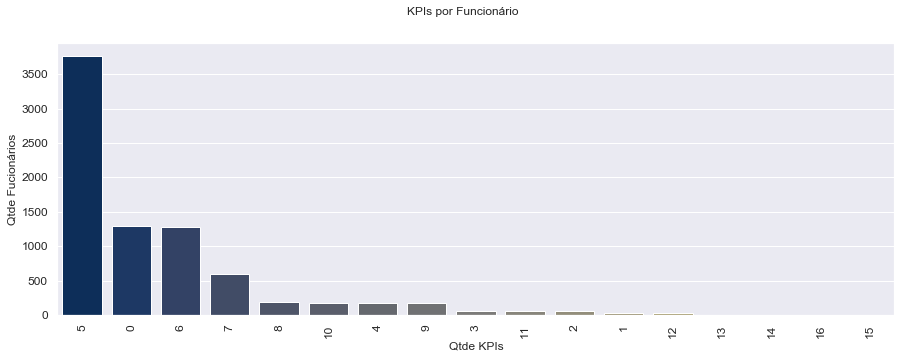

In [8]:
# Contagem de valores únicos por funcionários
group_func = df.groupby('Nome FuncionÁ¡rio').nunique()

# Quantidade de KPIs por Funcionário
descending_order = group_func['Código KPI'].value_counts().sort_values(ascending=False).index

fig, axs = plt.subplots(figsize=figsize)
plt.suptitle('KPIs por Funcionário')

ax1 = sns.countplot(group_func['Código KPI'], palette=colormap, order=descending_order)
ax1.set_xlabel('Qtde KPIs')
ax1.set_ylabel('Qtde Fucionários')
for tick in axs.get_xticklabels():
    tick.set_rotation(90)

Text(0.5,0.98,'KPIs Simultâneas por Funcionário')

Text(0.5,0,'Qtde KPIs')

Text(0,0.5,'Qtde Fucionários')

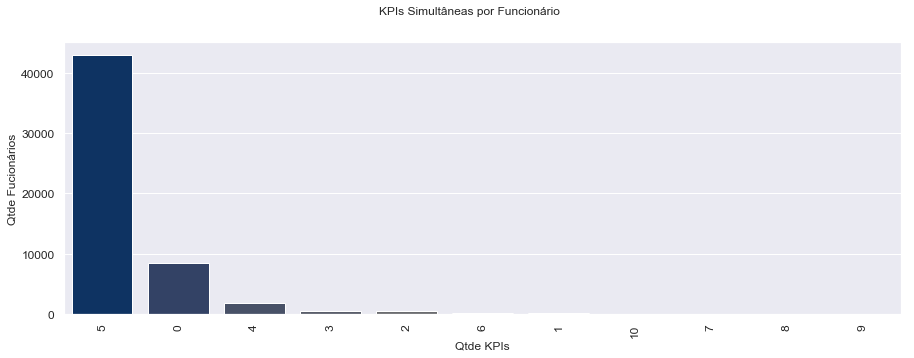

In [9]:
# Contagem de valores únicos por funcionários e mês
group_func = df.groupby(['Nome FuncionÁ¡rio', 'Mês Referência']).nunique()

# Quantidade de KPIs por Funcionário
descending_order = group_func['Código KPI'].value_counts().sort_values(ascending=False).index

fig, axs = plt.subplots(figsize=figsize)
plt.suptitle('KPIs Simultâneas por Funcionário')

ax1 = sns.countplot(group_func['Código KPI'], palette=colormap, order=descending_order)
ax1.set_xlabel('Qtde KPIs')
ax1.set_ylabel('Qtde Fucionários')
for tick in axs.get_xticklabels():
    tick.set_rotation(90)

## Ajustando os nomes das variáveis

Vamos organizar os nomes das variáveis de modo que simplifique a análise. As colunas serão renomeadas e será adicionado um prefixo a cada uma delas seguindo o padrão abaixo:

- VAriáveis categóricas:
    - Ordinais: *ord*
    - Binárias: *bin*
    - Nominais: *nom*
- Variáveis numéricas:
    - Discretas: *dis*
    - Cintínuas: *con*
    - Percentuais: *per*

In [10]:
new_names = {
    'Mês Referência': 'ord_mes_referencia',
    'País': 'nom_pais',
    'Mundo': 'nom_mundo',
    'Regional/Área': 'dis_regional_area',
    'Unidade': 'dis_unidade',
    'Grupo Cargo': 'nom_grupo_cargo',
    'Cargo': 'nom_cargo',
    'Grade': 'dis_grade',
    'Banda': 'nom_banda',
    'Área': 'nom_area',
    'Nome FuncionÁ¡rio': 'dis_nome_funcionario',
    'Nome Gestor': 'dis_nome_gestor',
    'Código KPI': 'nom_codigo_kpi',
    'Diretoria': 'nom_diretoria',
    'Áreas da Diretoria': 'nom_areas_diretoria',
    'Função': 'nom_funcao',
    'Tipo da Meta': 'nom_tipo_meta',
    'Categoria KPI': 'nom_categoria_kpi',
    'Nome KPI': 'dis_nome_kpi',
    'Peso KPI': 'per_peso_kpi',
    'Prazo': 'nom_prazo',
    'Regra Alcance Parcial': 'nom_regra_alcance_parcial',
    'Meta Projeto': 'bin_meta_projeto',
    '% Ating Mês': 'per_ating_mes',
    '% Pontos Mês': 'per_pontos_mes',
    '% Acum Mês': 'per_acum_mes',
    '% Ating Acumulado': 'per_ating_acumulado',
    '% Pontos Acumulado': 'per_pontos_acumulado',
    '% Acum Acumulado': 'per_acum_acumulado',
    '% Ating Fim Exer': 'per_ating_fim_exer',
    '% Pontos Fim Exer': 'per_pontos_fim_exer',
    '% Acum Fim Exer': 'per_acum_fim_exer',
    'Status Meta': 'bin_status_meta'
}

df.rename(index=str, columns=new_names, inplace=True)

## Questões preliminares

Apenas olhando essa análise inicial já temos algumas questões que podem nos levar a dados errados na nossa base. Vamos endereçá-las todas, uma a uma:

- Variáveis Unnamed criadas na conversão para csv
    - Unnamed: 33
    - Unnamed: 34
    - Unnamed: 35
    - Unnamed: 36
    - Unnamed: 37
- Colunas com % não deveriam aparecer com tipo `object`
    - % Ating Mês
    - % Pontos Mês
    - % Acum Mês
    - % Ating Acumulado
    - % Pontos Acumulado
- Validar se a meta projeto é mesmo binária (sim/não)
- Validar status meta - monitoramento aprovado ou não
- Remover o 2017 da coluna mês, apenas para limpar a visualização
- Observação inicial de Nulos

### Variáveis Unnamed

Essas variáveis não deveriam existir e serão apagadas, mas antes de apagá-las vamos observar o que fez com que elas fossem criadas.

In [11]:
df['Unnamed: 33'].value_counts(dropna=False)
df['Unnamed: 34'].value_counts(dropna=False)
df['Unnamed: 35'].value_counts(dropna=False)
df['Unnamed: 36'].value_counts(dropna=False)
df['Unnamed: 37'].value_counts(dropna=False)

NaN                       270604
100.0                         26
20.0                           2
Monitoramento Aprovado         1
Name: Unnamed: 33, dtype: int64

nan       270605
30.00         19
40.00          7
100.00         2
Name: Unnamed: 34, dtype: int64

nan       270631
100.00         2
Name: Unnamed: 35, dtype: int64

nan      270631
20.00         2
Name: Unnamed: 36, dtype: int64

NaN                       270631
Monitoramento Aprovado         2
Name: Unnamed: 37, dtype: int64

Aparentemente os dados das colunas anteriores foram empurrados para elas em algumas observações. Vamos olhar essas observações para decidir se podem ser aproveitadas ou devem ser excluídas

In [12]:
df[~df['Unnamed: 33'].isnull()]
df[~df['Unnamed: 34'].isnull()]
df[~df['Unnamed: 35'].isnull()]
df[~df['Unnamed: 36'].isnull()]
df[~df['Unnamed: 37'].isnull()]

,ord_mes_referencia,nom_pais,nom_mundo,dis_regional_area,dis_unidade,nom_grupo_cargo,nom_cargo,dis_grade,nom_banda,nom_area,dis_nome_funcionario,dis_nome_gestor,nom_codigo_kpi,nom_diretoria,nom_areas_diretoria,nom_funcao,nom_tipo_meta,nom_categoria_kpi,dis_nome_kpi,per_peso_kpi,nom_prazo,nom_regra_alcance_parcial,bin_meta_projeto,per_ating_mes,per_pontos_mes,per_acum_mes,per_ating_acumulado,per_pontos_acumulado,per_acum_acumulado,per_ating_fim_exer,per_pontos_fim_exer,per_acum_fim_exer,bin_status_meta,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37
9610,32017.00,Brasil,CE,1.00,275.00,ESPECIALISTA,ESPECIALISTA IV,15.00,V-A,MARKETING,954.00,588.00,001MK0404,Diretoria de Marketing,AC,GER MKT,Mandatório,Projetos/ Iniciativas de Longo Prazo/ Estratégia,1914.00,20.00,12/31/2017 12:00:00 AM,PA1: >=97,5% goal,achievement,80% of points_x000D_ PA2: >=95% goal,achievement,"60% of points""""",Não,100.00,100.00,20.00,100.00,100.0,20.00,100.00,100.00,20.00,Monitoramento Aprovado
31343,42017.00,Brasil,CE,1.00,275.00,ESPECIALISTA,ESPECIALISTA IV,15.00,V-A,MARKETING,954.00,588.00,001MK0404,Diretoria de Marketing,AC,GER MKT,Mandatório,Projetos/ Iniciativas de Longo Prazo/ Estratégia,1914.00,20.00,12/31/2017 12:00:00 AM,PA1: >=97,5% goal,achievement,80% of points_x000D_ PA2: >=95% goal,achievement,"60% of points""""",Não,100.00,100.00,20.00,100.00,100.0,20.00,100.00,100.00,20.00,Monitoramento Aprovado
80305,62017.00,Brasil,CE,1.00,275.00,ESPECIALISTA,ESPECIALISTA IV,15.00,V-A,MARKETING,3235.00,1510.00,001MK0464,Diretoria de Marketing,AC,GER MKT,Mandatório,Market Share/ Volume,591.00,20.00,43100.0,PA1: ABI MKT SHARE BGT OK = 80% of points_x000...,validated with VP and implemented in the mark...,Não,100.00,100.00,20.00,100.00,100.00,20.00,100.00,100.00,20.0,Monitoramento Aprovado,nan,nan,nan,NaN
231383,62017.00,PanamÁ¡,Finance,4.00,258.00,NaN,NaN,nan,NaN,NaN,1901.00,1727.00,NaN,NaN,NaN,NaN,Metas Individuales 1,Mejoria Contínua,2169.00,40.00,30.12.2017,Each detailed action will be considered achiev...,Self-assesment,training,"action splans) is achieved.""",NaN,NaN,NaN,nan,nan,100.00,40.00,NaN,100.00,40.00,nan,nan,NaN
231385,62017.00,PanamÁ¡,Finance,4.00,258.00,NaN,NaN,nan,NaN,NaN,1901.00,1727.00,NaN,NaN,NaN,NaN,Metas Individuales 2,Mejoria Contínua,3309.00,30.00,30.12.2017,Each detailed action will be considered achiev...,Self-assesment,training,"action splans) is achieved.""",NaN,NaN,NaN,nan,nan,100.00,30.00,NaN,100.00,30.00,nan,nan,NaN
231387,62017.00,PanamÁ¡,Finance,4.00,258.00,NaN,NaN,nan,NaN,NaN,1901.00,1727.00,NaN,NaN,NaN,NaN,Metas Individuales 3,Mejoria Contínua,352.00,30.00,30.12.2017,Each detailed action will be considered achiev...,Self-assesment,training,"action splans) is achieved.""",NaN,NaN,NaN,nan,nan,100.00,30.00,NaN,100.00,30.00,nan,nan,NaN
231415,62017.00,PanamÁ¡,Finance,4.00,258.00,NaN,NaN,nan,NaN,NaN,6707.00,148.00,NaN,NaN,NaN,NaN,Metas Individuales 1,Mejoria Contínua,2518.00,30.00,30.12.2017,Each detailed action will be considered achiev...,Self-assesment,training,"action splans) is achieved""",NaN,NaN,NaN,nan,nan,0.00,0.00,NaN,100.00,30.00,nan,nan,NaN
237217,72017.00,Panama,Finance,4.00,258.00,NaN,NaN,nan,NaN,NaN,1901.00,1727.00,NaN,NaN,NaN,NaN,Metas Individuales 1,Mejoria ContÃ­nua,2169.00,40.00,30.06.2017,Each detailed action will be considered achiev...,Self-assesment,training,"action splans) is achieved.""",NaN,NaN,NaN,nan,nan,100.00,40.00,NaN,100.00,40.00,nan,nan,NaN
237219,72017.00,Panama,Finance,4.00,258.00,NaN,NaN,nan,NaN,NaN,1901.00,1727.00,NaN,NaN,NaN,NaN,Metas Individuales 2,Mejoria ContÃ­nua,3309.00,30.00,30.06.2017,Each detailed action will be considered achiev...,Self-assesment,training,"action splans) is achieved.""",NaN,NaN,NaN,nan,nan,100.00,30.00,NaN,100.00,30.00,nan,nan,NaN
237221,72017.00,Panama,Finance,4.00,258.00,NaN,NaN,nan,NaN,NaN,1901.00,1727.00,NaN,NaN,NaN,NaN,Metas Individuales 3,Mejoria ContÃ­nua,352.00,30.00,30.06.2017,Each detailed action will be considered achiev...,Self-assesment,tra

,ord_mes_referencia,nom_pais,nom_mundo,dis_regional_area,dis_unidade,nom_grupo_cargo,nom_cargo,dis_grade,nom_banda,nom_area,dis_nome_funcionario,dis_nome_gestor,nom_codigo_kpi,nom_diretoria,nom_areas_diretoria,nom_funcao,nom_tipo_meta,nom_categoria_kpi,dis_nome_kpi,per_peso_kpi,nom_prazo,nom_regra_alcance_parcial,bin_meta_projeto,per_ating_mes,per_pontos_mes,per_acum_mes,per_ating_acumulado,per_pontos_acumulado,per_acum_acumulado,per_ating_fim_exer,per_pontos_fim_exer,per_acum_fim_exer,bin_status_meta,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37
9610,32017.00,Brasil,CE,1.00,275.00,ESPECIALISTA,ESPECIALISTA IV,15.00,V-A,MARKETING,954.00,588.00,001MK0404,Diretoria de Marketing,AC,GER MKT,Mandatório,Projetos/ Iniciativas de Longo Prazo/ Estratégia,1914.00,20.00,12/31/2017 12:00:00 AM,PA1: >=97,5% goal,achievement,80% of points_x000D_ PA2: >=95% goal,achievement,"60% of points""""",Não,100.00,100.00,20.00,100.00,100.0,20.00,100.00,100.00,20.00,Monitoramento Aprovado
31343,42017.00,Brasil,CE,1.00,275.00,ESPECIALISTA,ESPECIALISTA IV,15.00,V-A,MARKETING,954.00,588.00,001MK0404,Diretoria de Marketing,AC,GER MKT,Mandatório,Projetos/ Iniciativas de Longo Prazo/ Estratégia,1914.00,20.00,12/31/2017 12:00:00 AM,PA1: >=97,5% goal,achievement,80% of points_x000D_ PA2: >=95% goal,achievement,"60% of points""""",Não,100.00,100.00,20.00,100.00,100.0,20.00,100.00,100.00,20.00,Monitoramento Aprovado
231383,62017.00,PanamÁ¡,Finance,4.00,258.00,NaN,NaN,nan,NaN,NaN,1901.00,1727.00,NaN,NaN,NaN,NaN,Metas Individuales 1,Mejoria Contínua,2169.00,40.00,30.12.2017,Each detailed action will be considered achiev...,Self-assesment,training,"action splans) is achieved.""",NaN,NaN,NaN,nan,nan,100.00,40.00,NaN,100.00,40.00,nan,nan,NaN
231385,62017.00,PanamÁ¡,Finance,4.00,258.00,NaN,NaN,nan,NaN,NaN,1901.00,1727.00,NaN,NaN,NaN,NaN,Metas Individuales 2,Mejoria Contínua,3309.00,30.00,30.12.2017,Each detailed action will be considered achiev...,Self-assesment,training,"action splans) is achieved.""",NaN,NaN,NaN,nan,nan,100.00,30.00,NaN,100.00,30.00,nan,nan,NaN
231387,62017.00,PanamÁ¡,Finance,4.00,258.00,NaN,NaN,nan,NaN,NaN,1901.00,1727.00,NaN,NaN,NaN,NaN,Metas Individuales 3,Mejoria Contínua,352.00,30.00,30.12.2017,Each detailed action will be considered achiev...,Self-assesment,training,"action splans) is achieved.""",NaN,NaN,NaN,nan,nan,100.00,30.00,NaN,100.00,30.00,nan,nan,NaN
231415,62017.00,PanamÁ¡,Finance,4.00,258.00,NaN,NaN,nan,NaN,NaN,6707.00,148.00,NaN,NaN,NaN,NaN,Metas Individuales 1,Mejoria Contínua,2518.00,30.00,30.12.2017,Each detailed action will be considered achiev...,Self-assesment,training,"action splans) is achieved""",NaN,NaN,NaN,nan,nan,0.00,0.00,NaN,100.00,30.00,nan,nan,NaN
237217,72017.00,Panama,Finance,4.00,258.00,NaN,NaN,nan,NaN,NaN,1901.00,1727.00,NaN,NaN,NaN,NaN,Metas Individuales 1,Mejoria ContÃ­nua,2169.00,40.00,30.06.2017,Each detailed action will be considered achiev...,Self-assesment,training,"action splans) is achieved.""",NaN,NaN,NaN,nan,nan,100.00,40.00,NaN,100.00,40.00,nan,nan,NaN
237219,72017.00,Panama,Finance,4.00,258.00,NaN,NaN,nan,NaN,NaN,1901.00,1727.00,NaN,NaN,NaN,NaN,Metas Individuales 2,Mejoria ContÃ­nua,3309.00,30.00,30.06.2017,Each detailed action will be considered achiev...,Self-assesment,training,"action splans) is achieved.""",NaN,NaN,NaN,nan,nan,100.00,30.00,NaN,100.00,30.00,nan,nan,NaN
237221,72017.00,Panama,Finance,4.00,258.00,NaN,NaN,nan,NaN,NaN,1901.00,1727.00,NaN,NaN,NaN,NaN,Metas Individuales 3,Mejoria ContÃ­nua,352.00,30.00,30.06.2017,Each detailed action will be considered achiev...,Self-assesment,training,"action splans) is achieved.""",NaN,NaN,NaN,nan,nan,0.00,0.00,NaN,100.00,30.00,nan,nan,NaN
242836,82017.00,Panama,Finance,4.00,258.00,NaN,NaN,nan,NaN,NaN,1901.00,1727.00,NaN,NaN,NaN,NaN,Metas Individuales 1,Mejoria ContÃ­nua,2169.00,40.00,30.06.2017,Each detailed action will be considered achiev...,Self-assesment,training,"action splans) is achieved.""",NaN,NaN,NaN,nan,nan,100.00,40.00,NaN,1

,ord_mes_referencia,nom_pais,nom_mundo,dis_regional_area,dis_unidade,nom_grupo_cargo,nom_cargo,dis_grade,nom_banda,nom_area,dis_nome_funcionario,dis_nome_gestor,nom_codigo_kpi,nom_diretoria,nom_areas_diretoria,nom_funcao,nom_tipo_meta,nom_categoria_kpi,dis_nome_kpi,per_peso_kpi,nom_prazo,nom_regra_alcance_parcial,bin_meta_projeto,per_ating_mes,per_pontos_mes,per_acum_mes,per_ating_acumulado,per_pontos_acumulado,per_acum_acumulado,per_ating_fim_exer,per_pontos_fim_exer,per_acum_fim_exer,bin_status_meta,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37
9610,32017.00,Brasil,CE,1.00,275.00,ESPECIALISTA,ESPECIALISTA IV,15.00,V-A,MARKETING,954.00,588.00,001MK0404,Diretoria de Marketing,AC,GER MKT,Mandatório,Projetos/ Iniciativas de Longo Prazo/ Estratégia,1914.00,20.00,12/31/2017 12:00:00 AM,PA1: >=97,5% goal,achievement,80% of points_x000D_ PA2: >=95% goal,achievement,"60% of points""""",Não,100.00,100.00,20.00,100.00,100.0,20.00,100.00,100.00,20.00,Monitoramento Aprovado
31343,42017.00,Brasil,CE,1.00,275.00,ESPECIALISTA,ESPECIALISTA IV,15.00,V-A,MARKETING,954.00,588.00,001MK0404,Diretoria de Marketing,AC,GER MKT,Mandatório,Projetos/ Iniciativas de Longo Prazo/ Estratégia,1914.00,20.00,12/31/2017 12:00:00 AM,PA1: >=97,5% goal,achievement,80% of points_x000D_ PA2: >=95% goal,achievement,"60% of points""""",Não,100.00,100.00,20.00,100.00,100.0,20.00,100.00,100.00,20.00,Monitoramento Aprovado


,ord_mes_referencia,nom_pais,nom_mundo,dis_regional_area,dis_unidade,nom_grupo_cargo,nom_cargo,dis_grade,nom_banda,nom_area,dis_nome_funcionario,dis_nome_gestor,nom_codigo_kpi,nom_diretoria,nom_areas_diretoria,nom_funcao,nom_tipo_meta,nom_categoria_kpi,dis_nome_kpi,per_peso_kpi,nom_prazo,nom_regra_alcance_parcial,bin_meta_projeto,per_ating_mes,per_pontos_mes,per_acum_mes,per_ating_acumulado,per_pontos_acumulado,per_acum_acumulado,per_ating_fim_exer,per_pontos_fim_exer,per_acum_fim_exer,bin_status_meta,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37
9610,32017.00,Brasil,CE,1.00,275.00,ESPECIALISTA,ESPECIALISTA IV,15.00,V-A,MARKETING,954.00,588.00,001MK0404,Diretoria de Marketing,AC,GER MKT,Mandatório,Projetos/ Iniciativas de Longo Prazo/ Estratégia,1914.00,20.00,12/31/2017 12:00:00 AM,PA1: >=97,5% goal,achievement,80% of points_x000D_ PA2: >=95% goal,achievement,"60% of points""""",Não,100.00,100.00,20.00,100.00,100.0,20.00,100.00,100.00,20.00,Monitoramento Aprovado
31343,42017.00,Brasil,CE,1.00,275.00,ESPECIALISTA,ESPECIALISTA IV,15.00,V-A,MARKETING,954.00,588.00,001MK0404,Diretoria de Marketing,AC,GER MKT,Mandatório,Projetos/ Iniciativas de Longo Prazo/ Estratégia,1914.00,20.00,12/31/2017 12:00:00 AM,PA1: >=97,5% goal,achievement,80% of points_x000D_ PA2: >=95% goal,achievement,"60% of points""""",Não,100.00,100.00,20.00,100.00,100.0,20.00,100.00,100.00,20.00,Monitoramento Aprovado


,ord_mes_referencia,nom_pais,nom_mundo,dis_regional_area,dis_unidade,nom_grupo_cargo,nom_cargo,dis_grade,nom_banda,nom_area,dis_nome_funcionario,dis_nome_gestor,nom_codigo_kpi,nom_diretoria,nom_areas_diretoria,nom_funcao,nom_tipo_meta,nom_categoria_kpi,dis_nome_kpi,per_peso_kpi,nom_prazo,nom_regra_alcance_parcial,bin_meta_projeto,per_ating_mes,per_pontos_mes,per_acum_mes,per_ating_acumulado,per_pontos_acumulado,per_acum_acumulado,per_ating_fim_exer,per_pontos_fim_exer,per_acum_fim_exer,bin_status_meta,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37
9610,32017.00,Brasil,CE,1.00,275.00,ESPECIALISTA,ESPECIALISTA IV,15.00,V-A,MARKETING,954.00,588.00,001MK0404,Diretoria de Marketing,AC,GER MKT,Mandatório,Projetos/ Iniciativas de Longo Prazo/ Estratégia,1914.00,20.00,12/31/2017 12:00:00 AM,PA1: >=97,5% goal,achievement,80% of points_x000D_ PA2: >=95% goal,achievement,"60% of points""""",Não,100.00,100.00,20.00,100.00,100.0,20.00,100.00,100.00,20.00,Monitoramento Aprovado
31343,42017.00,Brasil,CE,1.00,275.00,ESPECIALISTA,ESPECIALISTA IV,15.00,V-A,MARKETING,954.00,588.00,001MK0404,Diretoria de Marketing,AC,GER MKT,Mandatório,Projetos/ Iniciativas de Longo Prazo/ Estratégia,1914.00,20.00,12/31/2017 12:00:00 AM,PA1: >=97,5% goal,achievement,80% of points_x000D_ PA2: >=95% goal,achievement,"60% of points""""",Não,100.00,100.00,20.00,100.00,100.0,20.00,100.00,100.00,20.00,Monitoramento Aprovado


Olhando para esses dados podemos tirar 2 conclusões:
- Os registros 9610 e 31343 que referem-se a dois especialistas parecem estar corretos, possuem apenas essas 5 colunas a mais que podem ter sido criadas por uma manipulação manual, sendo assim elas referem-se à alguma observação extra de alguém, mas não invalida os dados. Vamos manter esses dados e apenas excluir essas colunas deles, uma vez que não sabemos o significado delas.
- Os demais registros que aparecem com valor nas colunas `Unnamed: 33` e `Unnamed: 34` apresentam diversos problemas, como excesso de informação faltantes e dados inconsistentes, inclusive em algumas das colunas listadas acima (como o valor 43100.00 na coluna dte_prazo no registro 80305). Esses dados serão excluídos pois podem atrapalhar nossa análise e a performance do modelo que construiremos.

### Colunas % object
As colunas com percentual deveriam ser do tipo float. Vamos entender o que aconteceu.

In [13]:
df['per_ating_mes'].value_counts(dropna=False)
df['per_ating_mes'].value_counts(dropna=False)
df['per_pontos_mes'].value_counts(dropna=False)
df['per_acum_mes'].value_counts(dropna=False)
df['per_ating_acumulado'].value_counts(dropna=False)
df['per_pontos_acumulado'].value_counts(dropna=False)

NaN             164321
100.0            50723
0.0              22655
100.0            13115
0.0               7162
80.0              5890
90.0              4594
80.0              1242
90.0               902
 training           26
 achievement         2
Não                  1
Name: per_ating_mes, dtype: int64

NaN             164321
100.0            50723
0.0              22655
100.0            13115
0.0               7162
80.0              5890
90.0              4594
80.0              1242
90.0               902
 training           26
 achievement         2
Não                  1
Name: per_ating_mes, dtype: int64

NaN                                      164321
100.0                                     55012
0.0                                       24856
100.0                                      8827
60.0                                       6342
0.0                                        4961
80.0                                       4916
60.0                                        790
80.0                                        580
 action splans) is achieved."                21
 action splans) is achieved"                  5
 80% of points_x000D_ PA2: >=95% goal         2
Name: per_pontos_mes, dtype: int64

NaN             164347
20.0             43217
0.0              24940
20.0              6574
25.0              6450
15.0              6114
12.0              5623
0.0               4877
16.0              3716
25.0              1128
15.0               937
12.0               665
9.0                613
10.0               522
16.0               437
30.0               170
9.0                 68
6.0                 43
18.0                39
8.0                 39
10.0                37
24.0                35
30.0                17
18.0                 5
40.0                 4
21.0                 4
28.0                 3
24.0                 3
 achievement         2
6.0                  2
35.0                 1
100.0                1
Name: per_acum_mes, dtype: int64

NaN                 163920
100.0                55909
0.0                  22954
100.0                 8537
80.0                  7160
90.0                  5860
0.0                   4837
80.0                   848
90.0                   605
 60% of points""         2
20.0                     1
Name: per_ating_acumulado, dtype: int64

NaN      141310
100.0     67112
0.0       30694
60.0       8588
100.0      8537
80.0       8100
0.0        4837
60.0        848
80.0        605
Não           2
Name: per_pontos_acumulado, dtype: int64

Dois problemas encontrados aqui:
1. Valores não numéricos realmente existem na coluna, mas como a quantidade é baixa eles serão excluídos. Alguns deles inclusive devem ser as mesmas observações que detectamos com problema anteriormente.
2. Alguns valores iguais aparecem duas vezes na contagem, com contagens diferentes. Imagigo que isso possa ser pela forma como foram representados no arquivo, com espaço em alguns casos por exemplo, mas será facilmente corrigido quando fizermos o cast da coluna para float.

### Meta projeto

A variável `meta projeto` deveria ser binária, no máximo com alguns valores faltantes. Vamos apenas garantir que não existem valores estranhos nela.

In [14]:
df['bin_meta_projeto'].value_counts()

Não                                                                   101892
Sim                                                                     4818
05% hs paradas: 80% dos pontos                                            65
 available at SDCA+"                                                      34
 Self-assesment                                                           26
 Control and Gobernance) is achived"                                       8
 control and government) is received"                                      7
 control and goverment) is achieved."                                      4
5% goal                                                                    2
 validated with VP and implemented in the market = 60% of points""         1
Name: bin_meta_projeto, dtype: int64

A maior parte está ok. Alguns valores estão errados e parece ser o mesmo problema apresentado anteriormente que criou as colunas `Unnamed`. Novamente como o montante é baixo podemos descartar sem problemas. Vamos aproveitar para substituir `sim` e `não` em `1` e `0`.

### Status meta

A variável `bin_status_meta` deve informar se o monitoramento está aprovado ou não. Vamos transfprmar em `0` e `1` também, como a anterior.

In [15]:
df['bin_status_meta'].value_counts()

Monitoramento Aprovado    106710
20.0                          22
20.0                          11
0.0                            9
0.0                            3
16.0                           3
16.0                           3
12.0                           3
100.0                          2
Name: bin_status_meta, dtype: int64

### Lidando com as questões iniciais

Recapitulando:
1. Precisamos remover as colunas `Unnamed` e remover as observações que tenham valores preenchidos nessas colunas, exceto os registros `9610` e `31343`
2. Precisamos remover os valores não numéricos de todas as colunas `%` e fazer um cast para float nessas colunas.
3. Limpar a coluna `bin_meta_projeto` e stransformar seus valores em `1` e `0`.

In [16]:
# Permite encadear um processo de pré-processamento nos dados
# construindo um pipeline.
# Esta lib foi criada e é mantida por mim (Adriano Freitas)
# está ainda em estágio inicial. Mais info: https://ml-belt.readthedocs.io

prep_df = Prep(df)

#### Lidando com colunas Unnamed

In [17]:
%%capture

unnamed_cols = ['Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37']

prep_df \
    .apply_custom(replace_by_index, {
        'indexes': [9610, 31343],
        'cols': unnamed_cols,
        'val': np.nan
    }) \
    .drop_not_nulls(unnamed_cols) \
    .drop_cols(unnamed_cols)

#### Lidando com as colunas %

In [18]:
%%capture

per_cols = [
    'per_ating_mes',
    'per_pontos_mes',
    'per_acum_mes',
    'per_ating_acumulado',
    'per_pontos_acumulado'
]

per_cols_replace = {
    'per_ating_mes': -1,
    'per_pontos_mes': -1,
    'per_acum_mes': -1,
    'per_ating_acumulado': -1,
    'per_pontos_acumulado': -1
}

prep_df \
    .fill_null_with(-1.0, per_cols) \
    .apply_custom(check_float, {'cols': per_cols}) \
    .drop_nulls(per_cols) \
    .apply_custom(replace_nan, {'cols_dict': per_cols_replace})
    

#### Lidando com Meta Projeto

In [19]:
%%capture

prep_df.apply_custom(bin_to_num, {'cols': ['bin_meta_projeto'], 'one': ['Sim'], 'zero': ['Não']})

#### Lidando com Status Meta

In [20]:
%%capture

prep_df.apply_custom(bin_to_num, {'cols': ['bin_status_meta'], 'one': 'Monitoramento Aprovado'})

#### Lidando com Mês

In [21]:
%%capture

prep_df.apply_custom(transform_month, {'col': 'ord_mes_referencia'})

### Questões iniciais - Verficando o resultado

In [22]:
df = prep_df.df
df.shape
df.info()
df.head()
df['per_ating_mes'].value_counts(dropna=False)
df['per_ating_mes'].value_counts(dropna=False)
df['per_pontos_mes'].value_counts(dropna=False)
df['per_acum_mes'].value_counts(dropna=False)
df['per_ating_acumulado'].value_counts(dropna=False)
df['per_pontos_acumulado'].value_counts(dropna=False)
df['bin_meta_projeto'].value_counts(dropna=False)
df['bin_status_meta'].value_counts(dropna=False)

(270604, 33)

<class 'pandas.core.frame.DataFrame'>
Index: 270604 entries, 0 to 270632
Data columns (total 33 columns):
ord_mes_referencia           270604 non-null float64
nom_pais                     270604 non-null object
nom_mundo                    270472 non-null object
dis_regional_area            270604 non-null float64
dis_unidade                  270604 non-null float64
nom_grupo_cargo              230096 non-null object
nom_cargo                    262115 non-null object
dis_grade                    262115 non-null float64
nom_banda                    262115 non-null object
nom_area                     262113 non-null object
dis_nome_funcionario         270604 non-null float64
dis_nome_gestor              270604 non-null float64
nom_codigo_kpi               230226 non-null object
nom_diretoria                230226 non-null object
nom_areas_diretoria          230226 non-null object
nom_funcao                   230226 non-null object
nom_tipo_meta                270604 non-null object
nom_

,ord_mes_referencia,nom_pais,nom_mundo,dis_regional_area,dis_unidade,nom_grupo_cargo,nom_cargo,dis_grade,nom_banda,nom_area,dis_nome_funcionario,dis_nome_gestor,nom_codigo_kpi,nom_diretoria,nom_areas_diretoria,nom_funcao,nom_tipo_meta,nom_categoria_kpi,dis_nome_kpi,per_peso_kpi,nom_prazo,nom_regra_alcance_parcial,bin_meta_projeto,per_ating_mes,per_pontos_mes,per_acum_mes,per_ating_acumulado,per_pontos_acumulado,per_acum_acumulado,per_ating_fim_exer,per_pontos_fim_exer,per_acum_fim_exer,bin_status_meta
0,3.00,Brasil,Sales,10.00,78.00,GER DE VENDAS REVENDA,GERENTE DE VENDAS REVENDA II,12.00,VI-B,GERÊNCIA CD,2774.00,237.00,001VA0561,Diretoria de Vendas e Distribuição,AC,GER DE VENDAS,Mandatório,Market Share/ Volume,4729.00,25.00,12/31/2017 12:00:00 AM,"PA1: 99,5% da meta PA2: 99,0% da meta",0,0.00,0.00,0.00,0.00,0.00,0.00,100.00,100.00,25.00,1
1,3.00,Brasil,Sales,10.00,78.00,GER DE VENDAS REVENDA,GERENTE DE VENDAS REVENDA II,12.00,VI-B,GERÊNCIA CD,2774.00,237.00,001VA0609,Diretoria de Vendas e Distribuição,AC,GER DE VENDAS,Mandatório,Market Share/ Volume,3138.00,20.00,12/31/2017 12:00:00 AM,80% pontos: -10pp vs Bgt,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,0
2,3.00,Brasil,Sales,10.00,78.00,GER DE VENDAS REVENDA,GERENTE DE VENDAS REVENDA II,12.00,VI-B,GERÊNCIA CD,2774.00,237.00,001TM0051,Diretoria de Vendas e Distribuição,Trade Marketing,GER DE VENDAS,Mandatório,Market Share/ Volume,3103.00,20.00,12/31/2017 12:00:00 AM,PA1: 80% = 80% pts PA2: 60% = 60% pts,0,80.00,60.00,12.00,80.00,60.00,12.00,100.00,100.00,20.00,1
3,3.00,Brasil,Sales,10.00,78.00,GER DE VENDAS REVENDA,GERENTE DE VENDAS REVENDA II,12.00,VI-B,GERÊNCIA CD,2774.00,237.00,001VC0272,Diretoria de Vendas e Distribuição,Campo,GER DE VENDAS,Mandatório,Market Share/ Volume,4757.00,15.00,12/31/2017 12:00:00 AM,PA1: 95%_x000D_ PA2: 90%,0,100.00,100.00,15.00,90.00,80.00,12.00,100.00,100.00,15.00,1
4,3.00,Brasil,Sales,10.00,78.00,GER DE VENDAS REVENDA,GERENTE DE VENDAS REVENDA II,12.00,VI-B,GERÊNCIA CD,2774.00,237.00,001RF0335,Diretoria de Refrigenanc,AC,GER DE VENDAS,Mandatório,Market Share/ Volume,4762.00,20.00,12/31/2017 12:00:00 AM,"80% pontos: 97,5% da meta",NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,0


nan       164321
100.00     63838
0.00       29817
80.00       7132
90.00       5496
Name: per_ating_mes, dtype: int64

nan       164321
100.00     63838
0.00       29817
80.00       7132
90.00       5496
Name: per_ating_mes, dtype: int64

nan       164321
100.00     63838
0.00       29817
60.00       7132
80.00       5496
Name: per_pontos_mes, dtype: int64

nan      164321
20.00     49791
0.00      29817
25.00      7578
15.00      7051
12.00      6288
16.00      4153
9.00        681
10.00       559
30.00       187
6.00         45
18.00        44
8.00         39
24.00        38
40.00         4
21.00         4
28.00         3
35.00         1
Name: per_acum_mes, dtype: int64

nan       163894
100.00     64446
0.00       27791
80.00       8008
90.00       6465
Name: per_ating_acumulado, dtype: int64

nan       141284
100.00     75648
0.00       35531
60.00       9436
80.00       8705
Name: per_pontos_acumulado, dtype: int64

nan     163894
0.00    101892
1.00      4818
Name: bin_meta_projeto, dtype: int64

0    163894
1    106710
Name: bin_status_meta, dtype: int64

### Questões iniciais - Nulos
Vamos fazer uma primeira visualização dos dados iniciais sem ainda lidar com eles.

O primeiro gráfico é uma forma de visualizar a quantidade de nulos por colunas. 

O segundo gráfico nos mostra a posição dos nulos no nosso dataset. Fica fácil observar que algumas linhas ao fim do nosso dataset tem muitas colunas com dados faltantes na mesma observação. Esse comportamento será reforçado no terceiro gráfico.

No terceiro gráfico podemos visualizar a correlação entre nulos nas variáves, e podemos notar que em muitos casos possuem correlação de `1`, ou seja, em algumas observações, quando se falta informação, falta em várias colunas ao mesmo tempo. 

Voltaremos nesse assunto mais a frente para atacar esse problema.

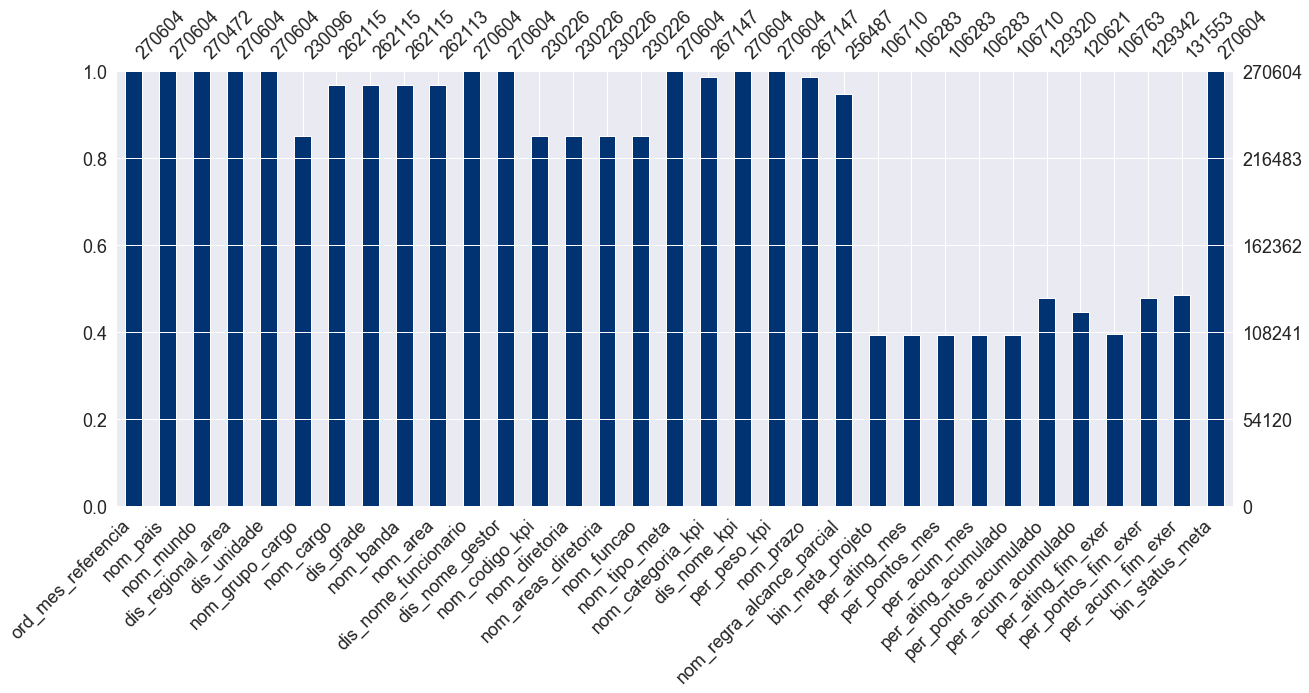

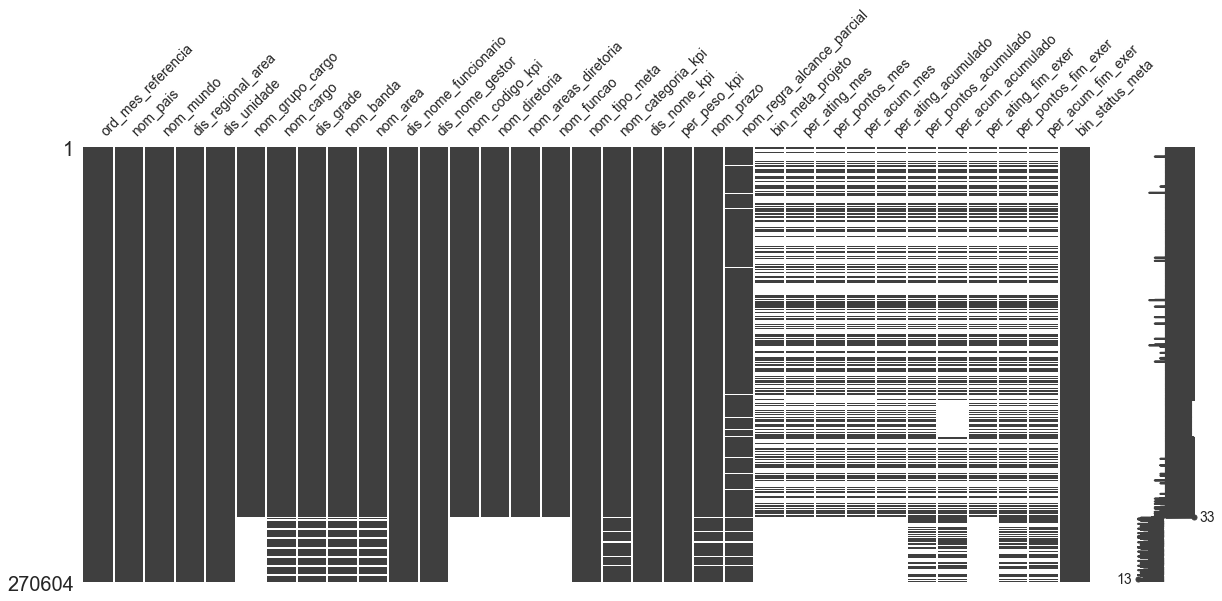

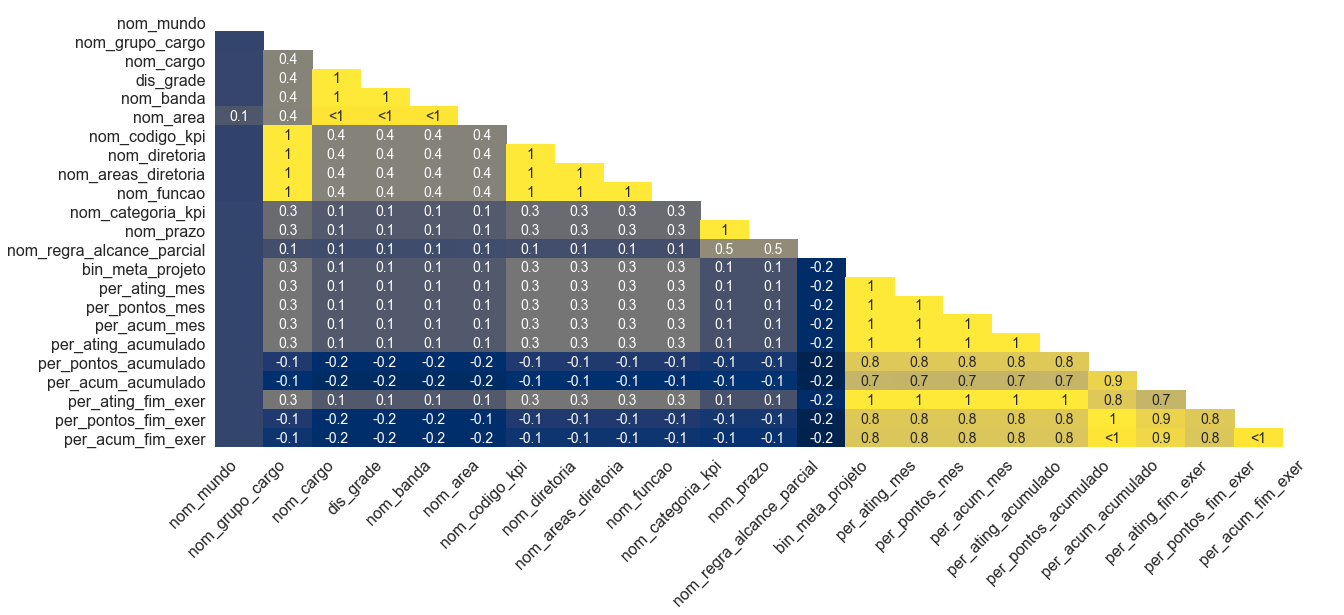

In [23]:
check_nulls(df)

Objetivo inicial atingido, vamos continuar com a análise.

## Matriz de correlação

Vamos entender a correlação entre as variáveis, isso será importante na sequência onde vamos identificar nosso target e olhar os nulos. A correlação pode nos ajudar a lidar com esses dados faltantes e nos dar dicas de como nossas variáveis que compõem o target estão relacionadas.

A primeira vista fica claro a alta correlação entre as variáveis que tratam o percentual de atingimento da meta.

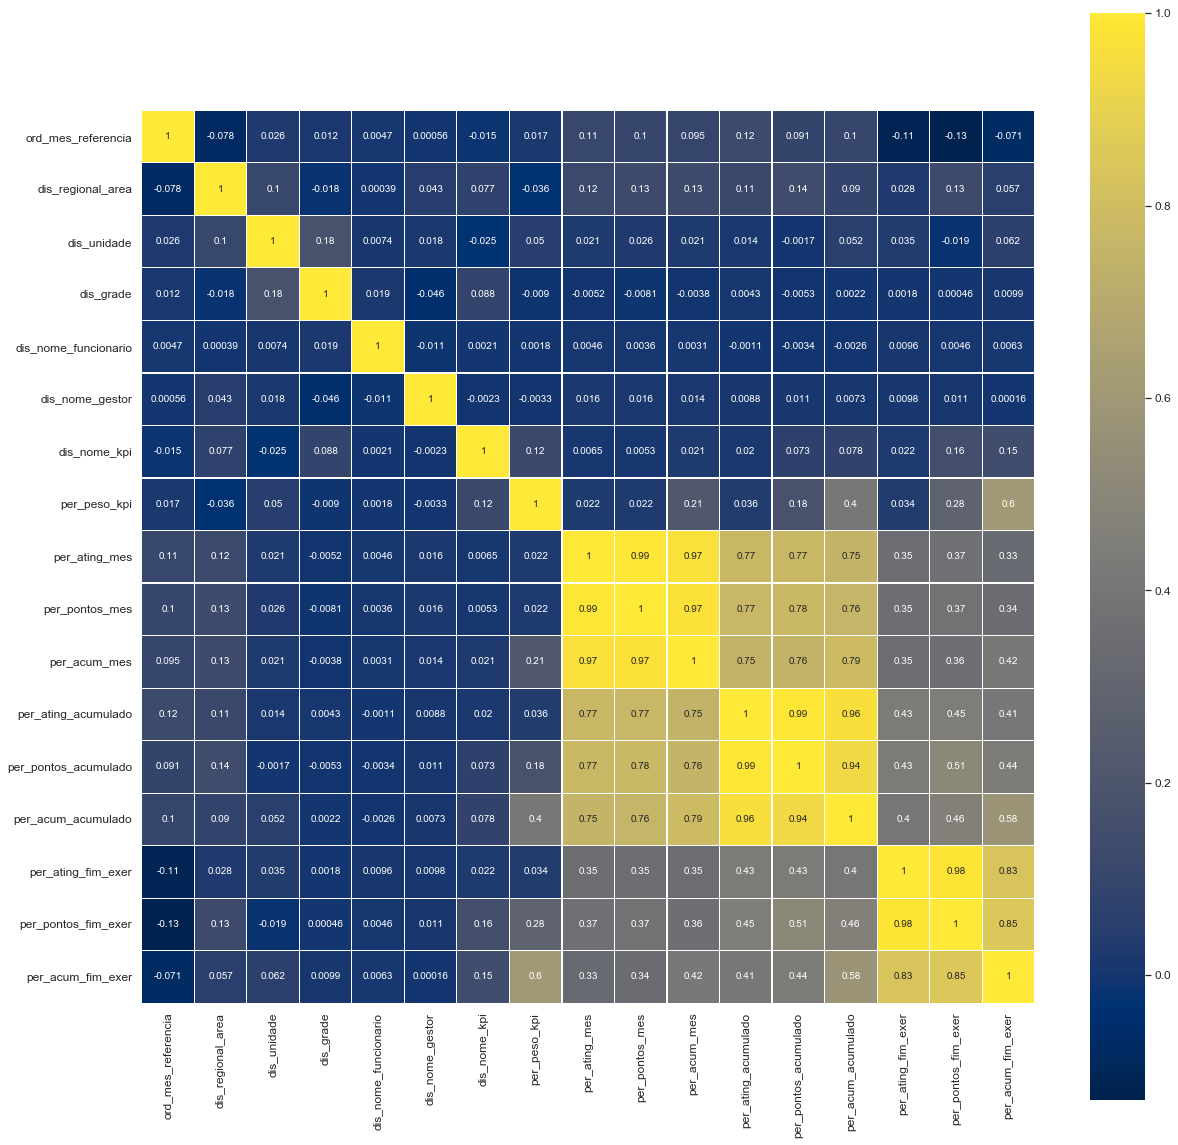

In [24]:
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(df.corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True, ax=ax)

## Definição de target
O objetovo final é construir um modelo capaz de prever o cumprimento das metas ao final do exercício (ano fiscal). A informação inicial é que cada pessoa (variável `dis_nome_funcionario`) possui 5 metas.

Vamos entender melhor o comportamento do nosso dataset em relação ao target.

### Definição das colunas

As metas estão atreladas a KPIs, cada KPI tem um peso (coluna `per_peso_kpi`) que retrata o percentual daquele KPI na meta final, ou seja, deve somar 100 para cada pessoa representando 100% da meta.

Além disso cada métrica possui um status indicando se o monitoramento foi aprovado ou não (coluna `bin_status_meta`). As métricas que não tiveram o monitoramento aprovado não possuem o percentual anotado nas colunas de acompanhamento descritas abaixo (evidenciado pela análise de nulos anterior e pelo código abaixo), sendo assim elas não são objeto de nossa análise e serão excuídas do dataset. Infelizmente isso representa mais da metade do nosso dataset.

Conforme pode ser observado [neste documento](http://cvmautomatico.mz-ir.com/Download.aspx?id=SFn7CoUwQkP55UPRxYdjbA%3D%3D\JjCvAYu5DGR9ZE0nMi9m%2FQ%3D%3D), o exercício social encerra-se em 31/12.

Não existem informações claras sobre cada variável, vamos assumir as seguintes premissas:

Como o último mês do dataset é também o fim do exercício, seria de se esperar que percentual da meta acumulado (coluna `per_acum_acumulado`) fosse igual ao percentual da meta atingido no final do exercício (coluna `per_acum_fim_exer`). Como isso não acontece podemos trabalhar com duas hipóteses:
1. O resultado exibido no mês refere-se ao mês anterior
2. O valor das colunas referentes ao final do exercício são projeções.

Vamos seguir em frente com a segunda hipótese. Na análise exploratória podemos validar melhor essa hipótese.

Temos 3 tipos de variáveis que retratam o atingimento das metas, são eles:
- **Atingido (ating)**: Qual é o percentual da meta atingido no mês.
- **Pontos (pontos)**: Os pontos são calculados baseado na regra de atingimento parcial (coluna `nom_regra_alcance_parcial`). Este valor é utilizado para calcular o atingimento final da meta.
- **Acumulativo (acum)**: Mostra de forma acumulativa decompondo a meta pelo peso do KPI. Esta coluna é calculada aplicando o peso do kpi sobre os pontos.

Esse trio se repete em três momentos distintos:
- **Mensal (mes)**: Qual é o status mensal de cada uma das medidas.
- **Acumulado (acumulado)**: Qual é o status acumulado até o momento de todos os meses. Possuem 10 meses ao todo.
- **Exercício (exer)**: Qual é a projeção para o fim do exercício.

In [25]:
# Metas com monitoramento não aprovado. serão excluídas.

df[df['bin_status_meta'] == 0]['per_ating_mes'].value_counts(dropna=False)
df[df['bin_status_meta'] == 0]['per_ating_mes'].value_counts(dropna=False)
df[df['bin_status_meta'] == 0]['per_pontos_mes'].value_counts(dropna=False)
df[df['bin_status_meta'] == 0]['per_acum_mes'].value_counts(dropna=False)
df[df['bin_status_meta'] == 0]['per_ating_acumulado'].value_counts(dropna=False)
df[df['bin_status_meta'] == 0]['per_pontos_acumulado'].value_counts(dropna=False)
df[df['bin_status_meta'] == 0]['bin_meta_projeto'].value_counts(dropna=False)

nan    163894
Name: per_ating_mes, dtype: int64

nan    163894
Name: per_ating_mes, dtype: int64

nan    163894
Name: per_pontos_mes, dtype: int64

nan    163894
Name: per_acum_mes, dtype: int64

nan    163894
Name: per_ating_acumulado, dtype: int64

nan       141284
100.00     11202
0.00        7740
80.00       2240
60.00       1428
Name: per_pontos_acumulado, dtype: int64

nan    163894
Name: bin_meta_projeto, dtype: int64

In [26]:
%%capture

# Excluindo metas não aprovadas e excluindo a colunda bin_meta_projeto, já que ela terá apenas o valor `1`
prep_df.apply_custom(filter_valid, {'col': 'bin_status_meta', 'valid_value': 1}) \
       .drop_cols(['bin_status_meta'])

In [27]:
df = prep_df.df
df.shape
df.head()

(106710, 32)

,ord_mes_referencia,nom_pais,nom_mundo,dis_regional_area,dis_unidade,nom_grupo_cargo,nom_cargo,dis_grade,nom_banda,nom_area,dis_nome_funcionario,dis_nome_gestor,nom_codigo_kpi,nom_diretoria,nom_areas_diretoria,nom_funcao,nom_tipo_meta,nom_categoria_kpi,dis_nome_kpi,per_peso_kpi,nom_prazo,nom_regra_alcance_parcial,bin_meta_projeto,per_ating_mes,per_pontos_mes,per_acum_mes,per_ating_acumulado,per_pontos_acumulado,per_acum_acumulado,per_ating_fim_exer,per_pontos_fim_exer,per_acum_fim_exer
0,3.00,Brasil,Sales,10.00,78.00,GER DE VENDAS REVENDA,GERENTE DE VENDAS REVENDA II,12.00,VI-B,GERÊNCIA CD,2774.00,237.00,001VA0561,Diretoria de Vendas e Distribuição,AC,GER DE VENDAS,Mandatório,Market Share/ Volume,4729.00,25.00,12/31/2017 12:00:00 AM,"PA1: 99,5% da meta PA2: 99,0% da meta",0,0.00,0.00,0.00,0.00,0.00,0.00,100.00,100.00,25.00
2,3.00,Brasil,Sales,10.00,78.00,GER DE VENDAS REVENDA,GERENTE DE VENDAS REVENDA II,12.00,VI-B,GERÊNCIA CD,2774.00,237.00,001TM0051,Diretoria de Vendas e Distribuição,Trade Marketing,GER DE VENDAS,Mandatório,Market Share/ Volume,3103.00,20.00,12/31/2017 12:00:00 AM,PA1: 80% = 80% pts PA2: 60% = 60% pts,0,80.00,60.00,12.00,80.00,60.00,12.00,100.00,100.00,20.00
3,3.00,Brasil,Sales,10.00,78.00,GER DE VENDAS REVENDA,GERENTE DE VENDAS REVENDA II,12.00,VI-B,GERÊNCIA CD,2774.00,237.00,001VC0272,Diretoria de Vendas e Distribuição,Campo,GER DE VENDAS,Mandatório,Market Share/ Volume,4757.00,15.00,12/31/2017 12:00:00 AM,PA1: 95%_x000D_ PA2: 90%,0,100.00,100.00,15.00,90.00,80.00,12.00,100.00,100.00,15.00
6,3.00,Brasil,Supply,20.00,14.00,SUPERVISOR FABRIL,SUPERVISOR SENIOR FABRIL,11.00,VI-C,PRODUçãO,7548.00,1983.00,001CC0161,Diretoria Industrial,CENG/CDT,SUPERVISOR,Mandatório,Melhoria Contínua,2424.00,20.00,12/31/2017 12:00:00 AM,100%: LTI (area) = 0 e LTI Fab <= Bgt e TRI (a...,0,100.00,100.00,20.00,100.00,100.00,20.00,100.00,100.00,20.00
8,3.00,Brasil,Supply,20.00,14.00,SUPERVISOR FABRIL,SUPERVISOR SENIOR FABRIL,11.00,VI-C,PRODUçãO,7548.00,1983.00,001SC0434,Diretoria Industrial,Campo,SUPERVISOR,Mandatório,Melhoria Contínua,4580.00,20.00,12/31/2017 12:00:00 AM,Conforme Matriz de Metas VPO 2017 disponível n...,0,100.00,100.00,20.00,100.00,100.00,20.00,100.00,100.00,20.00


## Nulos

Vamos Fazer uma segunda análise sobre os dados faltantes e agora sim lidar com eles. É possível observar que muitos dos valores faltantes foram removidos quando retiramos as metas não monitoradas.

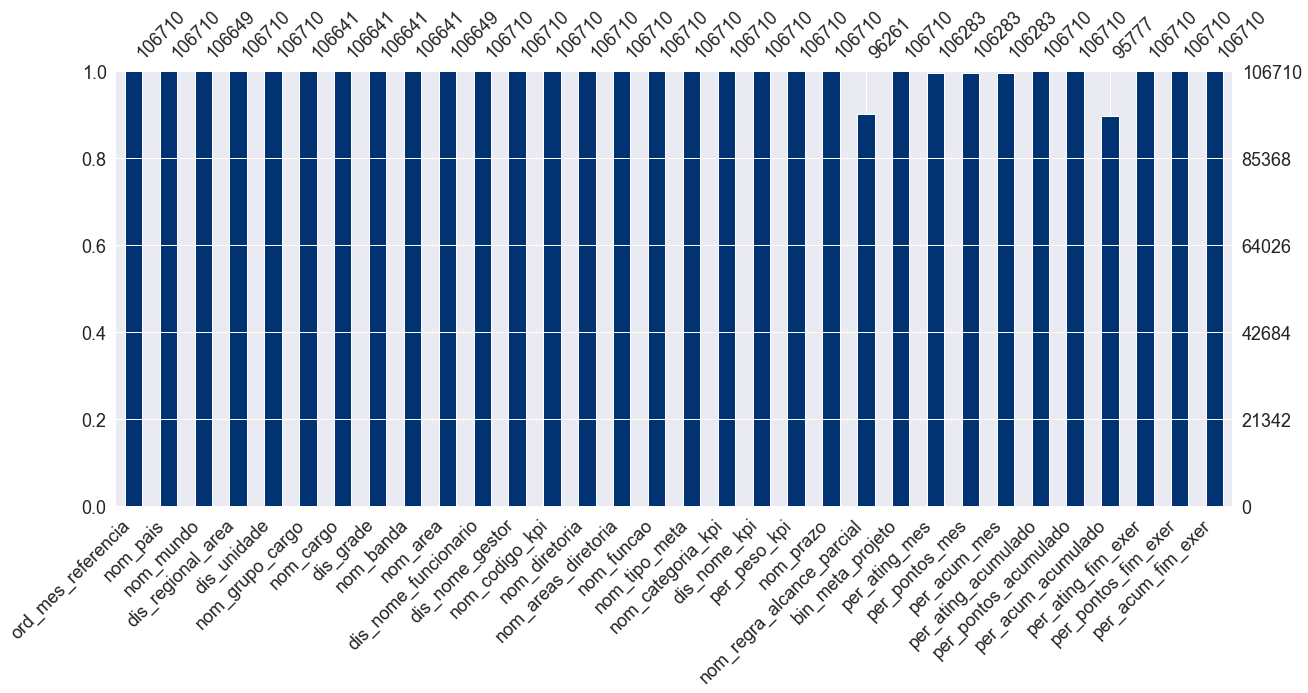

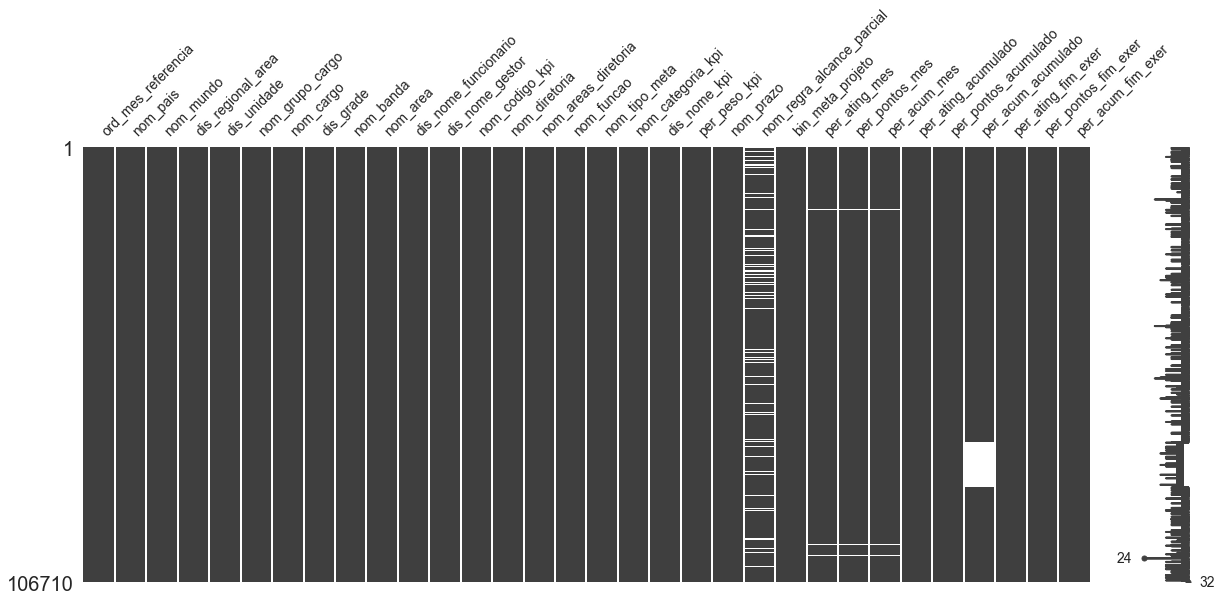

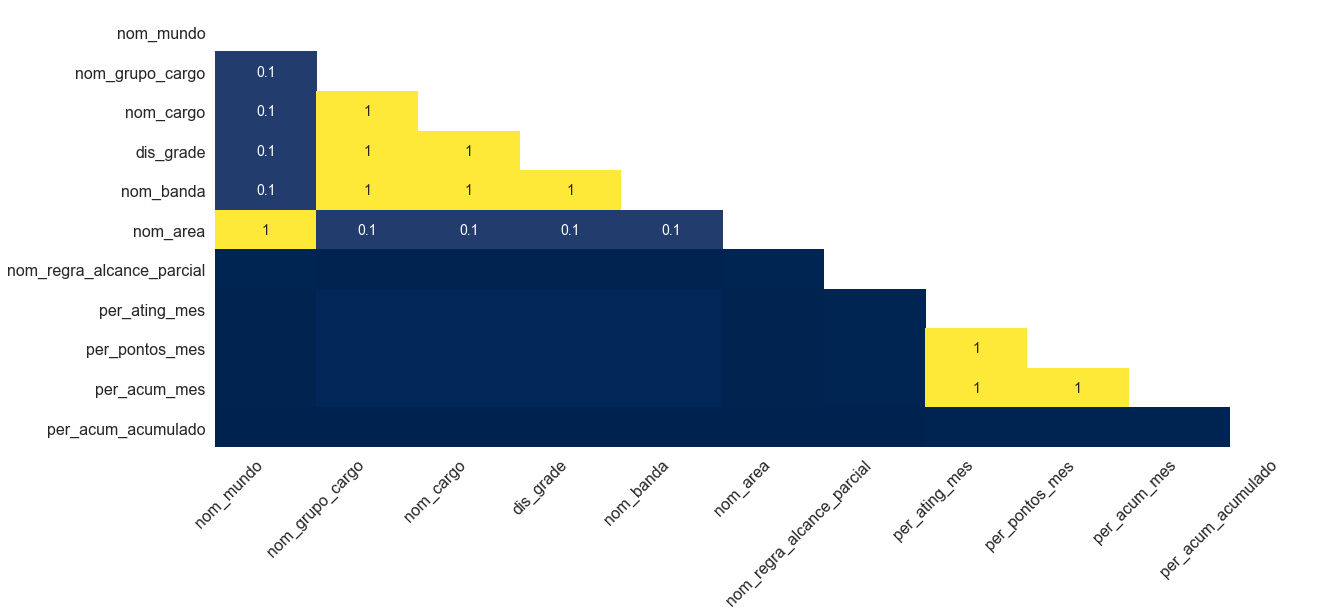

In [28]:
check_nulls(df)

Das observações acima podemos identificar rapidamente 4 pontos:
- A coluna `per_pontos_mes` é informação importante para a composição do target, nulos nela não podem ser aceitos e serão excluídos
- As colunas com mais dados faltantes são `per_acum_acumulado` e `nom_regra_alcance_parcial`
    - `per_acum_acumulado` é calculado, podemos preencher com os valores corretos.
    - `nom_regra_alcance_parcial` vamos preencher com uma string fixa ('N/A'). Depois na análise exploratória vamos entender melhor o valor dessa coluna.
- Existem 69 registros com nulos na maioria dessas colunas
    - Vamos fazer uma inspeção visual para confirmar pegando a coluna `num_grupo_cargo` como base.
- As colunas `nom_mundo` e `nom_area` não parecem fazer parte do grupo acima e serâo preenchidas com uma string fixa ('N/A')

In [29]:
# Inspeção visual para conferir o ponto 3 acima
df[df['nom_grupo_cargo'].isna()]

,ord_mes_referencia,nom_pais,nom_mundo,dis_regional_area,dis_unidade,nom_grupo_cargo,nom_cargo,dis_grade,nom_banda,nom_area,dis_nome_funcionario,dis_nome_gestor,nom_codigo_kpi,nom_diretoria,nom_areas_diretoria,nom_funcao,nom_tipo_meta,nom_categoria_kpi,dis_nome_kpi,per_peso_kpi,nom_prazo,nom_regra_alcance_parcial,bin_meta_projeto,per_ating_mes,per_pontos_mes,per_acum_mes,per_ating_acumulado,per_pontos_acumulado,per_acum_acumulado,per_ating_fim_exer,per_pontos_fim_exer,per_acum_fim_exer
5715,3.00,Brasil,Sales,12.00,301.00,NaN,NaN,nan,NaN,COMERCIAL AS,4383.00,0.00,001VA0561,Diretoria de Vendas e Distribuição,AC,GER CONTAS REGIONAL,Mandatório,Market Share/ Volume,4729.00,25.00,12/31/2017 12:00:00 AM,"PA1: 99,5% da meta PA2: 99,0% da meta",0,100.00,100.00,25.00,100.00,100.00,25.00,100.00,100.00,25.00
5716,3.00,Brasil,Sales,12.00,301.00,NaN,NaN,nan,NaN,COMERCIAL AS,4383.00,0.00,001GG0305,Diretoria de Gente,AC,GER CONTAS REGIONAL,Menu,Melhoria Contínua,3888.00,20.00,12/31/2017 12:00:00 AM,Regra de alcance parcial de acordo com Genius ...,0,100.00,100.00,20.00,100.00,100.00,20.00,100.00,100.00,20.00
5718,3.00,Brasil,Sales,12.00,301.00,NaN,NaN,nan,NaN,COMERCIAL AS,4383.00,0.00,001VA0706,Diretoria de Vendas e Distribuição,AC,GER CONTAS REGIONAL,Mandatório,Market Share/ Volume,4763.00,20.00,12/31/2017 12:00:00 AM,Parcial 1: 90% da meta (80% dos pontos). Parci...,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5719,3.00,Brasil,Sales,12.00,301.00,NaN,NaN,nan,NaN,COMERCIAL AS,4383.00,0.00,001LO0718,Diretoria Logística,AC,GER CONTAS REGIONAL,Mandatório,"Rentabilidade/ Custos (Maco, VIC, VLC, Ebitda,...",4759.00,20.00,12/31/2017 12:00:00 AM,"P1: 97,5% da meta - 80% dos pontos_x000D_ P2 9...",0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
28248,4.00,Brasil,NaN,0.00,0.00,NaN,NaN,nan,NaN,NaN,7294.00,0.00,001GG0039,Diretoria de Gente,AC,"GER OPERAçÁ"" ES DISTRIB ROTA",Mandatório,GenteÂ eÂ Gestão,2428.00,20.00,12/31/2017 12:00:00 AM,80% dos pontos: Bater a meta de TRI (Próprio+T...,0,100.00,100.00,20.00,100.00,100.00,20.00,100.00,100.00,20.00
28249,4.00,Brasil,NaN,0.00,0.00,NaN,NaN,nan,NaN,NaN,7294.00,0.00,001LO0495,Diretoria Logística,AC,"GER OPERAçÁ"" ES DISTRIB ROTA",Mandatório,"Rentabilidade/ Custos (Maco, VIC, VLC, Ebitda,...",658.00,20.00,12/31/2017 12:00:00 AM,Parcial: 80% Pontos - CDP HL Bar Pequeno <= Me...,0,100.00,100.00,20.00,100.00,100.00,20.00,100.00,100.00,20.00
28250,4.00,Brasil,NaN,0.00,0.00,NaN,NaN,nan,NaN,NaN,7294.00,0.00,001LO0619,Diretoria Logística,AC,"GER OPERAçÁ"" ES DISTRIB ROTA",Mandatório,"Rentabilidade/ Custos (Maco, VIC, VLC, Ebitda,...",1224.00,20.00,12/31/2017 12:00:00 AM,Conforme atingimento dos KPIs do Champions:_x0...,0,100.00,100.00,20.00,0.00,0.00,0.00,100.00,100.00,20.00
28251,4.00,Brasil,NaN,0.00,0.00,NaN,NaN,nan,NaN,NaN,7294.00,0.00,001GG0305,Diretoria de Gente,AC,"GER OPERAçÁ"" ES DISTRIB ROTA",Mandatório,Melhoria Contínua,3888.00,20.00,12/31/2017 12:00:00 AM,Regra de alcance parcial de acordo com Genius ...,0,100.00,100.00,20.00,100.00,100.00,20.00,90.00,80.00,16.00
68636,6.00,Brasil,Supply,21.00,231.00,NaN,NaN,nan,NaN,PACKAGING,6101.00,0.00,001SC0238,Diretoria Industrial,Campo,SUPERVISOR,Mandatório,Melhoria Contínua,4237.00,20.00,43100.0,Plantas com Bgt >= 6: TRI<= Bgt e LTI <= Bgt ...,0,100.00,100.00,20.00,100.00,100.00,20.00,100.00,100.00,20.00
68637,6.00,Brasil,Supply,21.00,231.00,NaN,NaN,nan,NaN,PACKAGING,6101.00,0.00,001SC0434,Diretoria Industrial,Campo,SUPERVISOR,Genérico,Melhoria Contínua,4580.00,25.00,43100.0,Conforme Matriz de Metas VPO 2017 disponível n...,0,0.00,0.00,0.00,0.00,0.00,0.00,100.00,100.00,25.00


#### Conclusão sobre os 69 registros
69 registros é um número baixo, e a qualidade dos dados está muito baixa, faltando em muitas colunas, vamos excluir esses regisros e verificar o que sobra de nulos.

In [30]:
%%capture

prep_df.drop_nulls(['nom_grupo_cargo', 'per_pontos_mes']) \
    .fill_null_with('N/A', ['nom_regra_alcance_parcial', 'nom_mundo', 'nom_area']) \
    .apply_custom(calc_per_acum)

#### Verificando se sobrou algum nulo

In [31]:
# Verificando se sobrou algum null
prep_df.df.isna().any()

ord_mes_referencia           False
nom_pais                     False
nom_mundo                    False
dis_regional_area            False
dis_unidade                  False
nom_grupo_cargo              False
nom_cargo                    False
dis_grade                    False
nom_banda                    False
nom_area                     False
dis_nome_funcionario         False
dis_nome_gestor              False
nom_codigo_kpi               False
nom_diretoria                False
nom_areas_diretoria          False
nom_funcao                   False
nom_tipo_meta                False
nom_categoria_kpi            False
dis_nome_kpi                 False
per_peso_kpi                 False
nom_prazo                    False
nom_regra_alcance_parcial    False
bin_meta_projeto             False
per_ating_mes                False
per_pontos_mes               False
per_acum_mes                 False
per_ating_acumulado          False
per_pontos_acumulado         False
per_acum_acumulado  

### Coluna `bin_meta_projeto`

Agora que não sobrou nenhum nulo, podemos converter a coluna `bin_meta_projeto` para float.

In [32]:
%%capture

prep_df.apply_custom(astype, {'cols': ['bin_meta_projeto'], 'new_type': 'float64'})

#### Recuperando noso dataframe com as alterações até aqui

In [33]:
df = prep_df.df
df.shape

(106217, 32)

## Organizando os dados no tempo

Antes de mais nada, este dataset se trata de uma série temporal, então vamos organizar os dados no tempo. Vamos ordenar por mes, meta e funcionário.

In [34]:
df = df.sort_values(by=['ord_mes_referencia', 'nom_codigo_kpi', 'dis_nome_funcionario']).reset_index()

## Versão Final

Vamos guardar uma versão final do nosso dataset com todas as alterações aplicadas. Sobre essa base que faremos nossas análises e aplicaremos nosso algoritmo para previsão de atingimento de metas. A versão final deve residir na pasta `processed`

In [35]:
processed_data_path = '../data/processed/'
processed_file_name = 'ambev-final-dataset-processed.csv'
processed_file = os.path.join(processed_data_path, processed_file_name)

In [36]:
if not os.path.isfile(processed_file):
    df = prep_df.df
    df.to_csv(processed_file, index=False)